# Fashion Classification Challenge
## Challenge at: https://dockship.io/challenges/5efd8aa88a71d71db311a86f/fashion-mnist-classification-challenge/overview

In [1]:
import keras
import tensorflow as tf
import numpy as np
import time
import gzip
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout,BatchNormalization

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras import backend as K
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 6} ) 
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

In [3]:
from keras import backend as K

def F1_Score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [4]:
picsfile = gzip.open('/fashion_mnist_classification_challenge-dataset/Fashion_MNIST/train-images-idx3-ubyte.gz', 'r')
lblsfile = gzip.open('/fashion_mnist_classification_challenge-dataset/Fashion_MNIST/train-labels-idx1-ubyte.gz', 'r')

In [5]:
picsfile.read(16)
lblsfile.read(8)
pics=picsfile.read(28*28*60000)
lbls=lblsfile.read(60000)

In [6]:
x = np.frombuffer(pics, dtype=np.uint8).astype(np.float32).reshape(60000, 28, 28, 1)
y = np.frombuffer(lbls, dtype=np.uint8).astype(np.float32).reshape(60000,1)

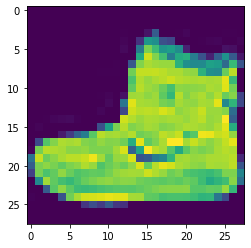

In [7]:
plt.imshow(x[0])

In [8]:
x=x/255. #Normalize the inputs

In [9]:
y=tf.one_hot(y,10)

In [10]:
y[0]

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [11]:
y=y.numpy().reshape(60000,10)

In [12]:
def makeModel():
    model=Sequential()
    model.add( Conv2D(filters=16, kernel_size=(4,4), padding='Same',activation='relu', input_shape=(28,28,1)) )
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add( Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu') )
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add( Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu') )
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add( Conv2D(filters=64, kernel_size=(2,2), padding='Same',activation='relu') )
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.summary()
    return model

In [13]:
def makeModel2():
    model=Sequential()
    model.add( Conv2D(filters=32, kernel_size=(4,4), padding='Same',activation='relu', input_shape=(28,28,1)) )
    model.add(BatchNormalization())
    model.add( Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu') )
    model.add(BatchNormalization())
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add( Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu') )
    model.add(BatchNormalization())
    model.add( Conv2D(filters=64, kernel_size=(2,2), padding='Same',activation='relu') )
    model.add(BatchNormalization())
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add( Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu') )
    model.add(BatchNormalization())
    model.add( Conv2D(filters=128, kernel_size=(2,2), padding='Same',activation='relu') )
    model.add(BatchNormalization())
    model.add( MaxPool2D(pool_size=(2,2)) )
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    
    model.summary()
    return model

In [14]:
model=makeModel2()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',F1_Score])

In [16]:
history=model.fit(x,y,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 29s 32ms/step - loss: 0.4679 - accuracy: 0.8321 - F1_Score: 0.8321 - val_loss: 0.3331 - val_accuracy: 0.8815 - val_F1_Score: 0.8837
Epoch 2/50
750/750 [==============================] - 24s 32ms/step - loss: 0.3080 - accuracy: 0.8863 - F1_Score: 0.8876 - val_loss: 0.2726 - val_accuracy: 0.9022 - val_F1_Score: 0.9035
Epoch 3/50
750/750 [==============================] - 23s 31ms/step - loss: 0.2642 - accuracy: 0.9025 - F1_Score: 0.9030 - val_loss: 0.2416 - val_accuracy: 0.9136 - val_F1_Score: 0.9141
Epoch 4/50
750/750 [==============================] - 22s 30ms/step - loss: 0.2424 - accuracy: 0.9112 - F1_Score: 0.9113 - val_loss: 0.2123 - val_accuracy: 0.9197 - val_F1_Score: 0.9217
Epoch 5/50
750/750 [==============================] - 22s 30ms/step - loss: 0.2217 - accuracy: 0.9185 - F1_Score: 0.9186 - val_loss: 0.2400 - val_accuracy: 0.9153 - val_F1_Score: 0.9158
Epoch 6/50
750/750 [==============================] - 22s 30ms/step - 

Epoch 45/50
750/750 [==============================] - 22s 30ms/step - loss: 0.0333 - accuracy: 0.9880 - F1_Score: 0.9881 - val_loss: 0.2926 - val_accuracy: 0.9383 - val_F1_Score: 0.9390
Epoch 46/50
750/750 [==============================] - 22s 30ms/step - loss: 0.0318 - accuracy: 0.9885 - F1_Score: 0.9886 - val_loss: 0.2555 - val_accuracy: 0.9369 - val_F1_Score: 0.9373
Epoch 47/50
750/750 [==============================] - 22s 30ms/step - loss: 0.0300 - accuracy: 0.9897 - F1_Score: 0.9897 - val_loss: 0.2939 - val_accuracy: 0.9323 - val_F1_Score: 0.9327
Epoch 48/50
750/750 [==============================] - 22s 30ms/step - loss: 0.0329 - accuracy: 0.9879 - F1_Score: 0.9879 - val_loss: 0.2818 - val_accuracy: 0.9367 - val_F1_Score: 0.9370
Epoch 49/50
750/750 [==============================] - 22s 30ms/step - loss: 0.0307 - accuracy: 0.9884 - F1_Score: 0.9883 - val_loss: 0.2872 - val_accuracy: 0.9362 - val_F1_Score: 0.9364
Epoch 50/50
750/750 [==============================] - 22s 30ms/s

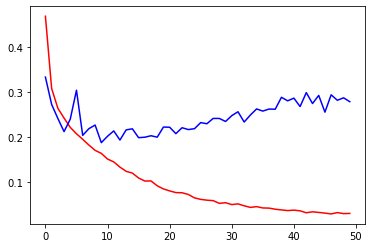

In [17]:
plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'blue')

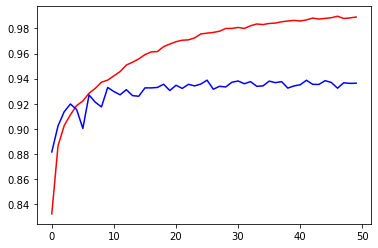

In [18]:
plt.plot(history.history['accuracy'],'red')
plt.plot(history.history['val_accuracy'],'blue')

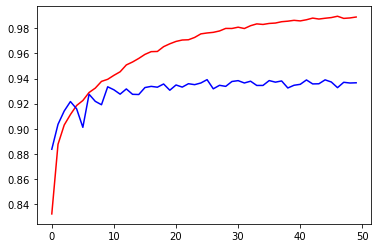

In [19]:
plt.plot(history.history['F1_Score'],'red')
plt.plot(history.history['val_F1_Score'],'blue')

## Testing time!

In [20]:
from PIL import Image,ImageOps
import os
dirr=r'/fashion_mnist_classification_challenge-dataset/Fashion_MNIST/test/'
fname, test = [], []

for file in os.listdir(dirr):
    img = ImageOps.grayscale(Image.open(dirr+file))
    fname.append(file)
    test.append(np.array(img).reshape(28, 28, 1))

test = np.array(test)
test=test/255.

In [21]:
test.shape

(10000, 28, 28, 1)

In [22]:
preds=model.predict(test)

In [23]:
predsNumbers=np.argmax(preds,axis=1)

In [24]:
predsNumbers

array([9, 7, 2, ..., 1, 8, 1], dtype=int64)

In [25]:
submit = pd.DataFrame({'filename': fname, 'label': predsNumbers})
submit.to_csv('Attempt 4.csv', index=False)